# Задание 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt

eps = 10 ** (-6)

## Задание 2А
$1 / (k^2 - k - z) \leq 1 / k^{1.9} \Leftrightarrow k^{1.9} \leq k^{2} - k - z$ (верно начиная с какого-то k)

$\Rightarrow k^{1.9} + k + z \leq k^{2}$ тоже с какого-то k

Поэтому оценим интегралом $\int_n^{+\infty}{1 / x^{1.9} dx} = 10 / (9 * n^{9/10})$, что должно быть равно eps

Тогда $10 / (9 * n^{9/10}) = eps \Leftrightarrow n \approx 5218052$

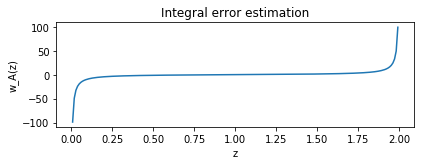

In [5]:
def w_A(z):
    n = 5218052
    res = 0
    for k in range(1, n + 1):
        res += 1 / (k ** 2 - k - z)
    return res


def taskA():
    data_x = []
    data_y = []
    step = 0.01
    z = 0 + step
    while z < 2:
        data_x.append(z)
        data_y.append(w_A(z))
        z += step
    plt.subplot(211)
    plt.title("Integral error estimation")
    plt.plot(data_x, data_y)
    plt.ylabel("w_A(z)")
    plt.xlabel("z")

plt.figure(1)
taskA()
plt.tight_layout()
plt.show()

## Задание 2B
Модельный ряд: $\sum_1^{+\infty}{1 / k^2}$. Очевидно, что отношение членов ряда стремится к единице.

$\sum_1^{+\infty}{1 / k^2} = \pi^2 / 6 = s$. 

Тогда надо посчитать $s + \sum_1^{+\infty}(1 / (k^2 - k - z) - 1 / k^2)$

$1 / (k^2 - k - z) - 1 / k^2 = (k + z) / (k^2 * (k^2 - k - z)) = (1 + z / k) / (k * (k^2 - k - z)) \leq 2 / k^{2.9}$ с какого-то k.

Тогда оцениваем $\int_n^{+\infty}{2 / k^2.9} = 20 / (19 * n^{19/10})$

Решаем уравнение $20 / (19 * n^{19/10}) = eps \Leftrightarrow n \approx 1478$

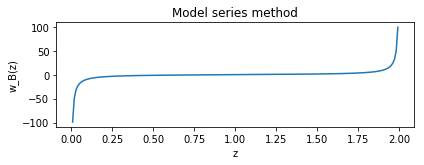

In [6]:
def w_B(z):
    n = 1478
    res = np.pi ** 2 / 6
    for k in range(1, n + 1):
        res += 1 / (k ** 2 - k - z) - 1 / k ** 2
    return res


def taskB():
    data_x = []
    data_y = []
    step = 0.01
    z = 0 + step
    while z < 2:
        data_x.append(z)
        data_y.append(w_B(z))
        z += step
    plt.subplot(211)
    plt.title("Model series method")
    plt.plot(data_x, data_y)
    plt.ylabel("w_B(z)")
    plt.xlabel("z")
    
plt.figure(1)
taskB()
plt.tight_layout()
plt.show()

## Задание 2C
Просто посмотрим на $w_A - w_B$.

Очевидно он должен быть от $-2 * eps$ до $2 * eps$, то есть от $-2 * 10^{-6}$ до $2 * 10^{-6}$

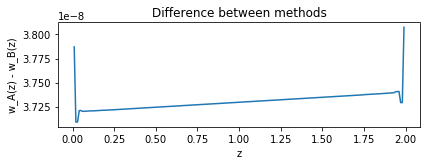

In [7]:
def taskC():
    data_x = []
    data_y = []
    step = 0.01
    z = 0 + step
    while z < 2:
        data_x.append(z)
        data_y.append(w_A(z) - w_B(z))
        z += step
    plt.subplot(211)
    plt.title("Difference between methods")
    plt.plot(data_x, data_y)
    plt.ylabel("w_A(z) - w_B(z)")
    plt.xlabel("z")

plt.figure(1)
taskC()
plt.tight_layout()
plt.show()

# Задание 3

## Задание 3.1
Посчитаем значения в точках с помощью метода Эйткина и в Вольфраме (вместо Вольфрама можно использовать долгое вычисление $s(z)$ путем вычисления первых $10^6$ членов ряда). 

Посмотрим на модуль разности.

In [9]:
def s_eitken(z, n):
    s1 = z
    s2 = s1 + 1 / 3 * z ** 2
    s3 = s2 + 1 / 5 * z ** 3
    res = s3 - (s3 - s2) ** 2 / (s3 - s2 - s2 + s1)
    for k in range(4, n + 1):
        s1 = s2
        s2 = s3
        s3 += 1 / (2 * k - 1) * z ** k
        if s3 - s2 - s2 + s1 != 0:
            res = s3 - (s3 - s2) ** 2 / (s3 - s2 - s2 + s1)
    return res

def calculate_value(z, wolfram_value):
    print("--s(" + str(z) + ")--")
    wolfram_value = wolfram_value
    eitken_value = s_eitken(z, 10 ** 3)
    print("wolfram: " + str(wolfram_value))
    print("eitkens method: " + str(eitken_value))
    print("abs of difference: " + str(abs(wolfram_value - eitken_value)))
    print("---")
    
calculate_value(-0.9, -0.720117)
calculate_value(-1, -0.7853981633974483)
calculate_value(np.e ** (3j * np.pi / 4), -0.647215 + 0.486294j)
calculate_value(1j, -0.243747747 + 0.86697299j)

--s(-0.9)--
wolfram: -0.720117
eitkens method: -0.7201172295789915
abs of difference: 2.2957899148412508e-07
---
--s(-1)--
wolfram: -0.7853981633974483
eitkens method: -0.7853981633347608
abs of difference: 6.268752184013238e-11
---
--s((-0.7071067811865475+0.7071067811865476j))--
wolfram: (-0.647215+0.486294j)
eitkens method: (-0.6484643617326987+0.4868128489963278j)
abs of difference: 0.0013528152202434657
---
--s(1j)--
wolfram: (-0.243747747+0.86697299j)
eitkens method: (-0.24374774707399066+0.8669729874649712j)
abs of difference: 2.5361084180342663e-09
---


## Задание 3.2
Генерируем точки на верхней дуге единичной окружности и смотрим на $log_{10}(1 / |s(z) - s_{eitken}(z)|)$, где $s(z)$ считается путям вычисления первых $10^6$ членов ряда (ее то и можно было использовать выше вместо Вольфрама).

Точки берем на окружности, потому что внутри окружности сходимость быстрее.

Можно видеть, что в точке (1; 0) она расходится и график этому соответсвтует

/home/mikhail/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


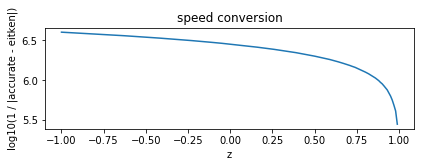

In [11]:
def s(z):
    n = 10 ** 6
    res = 0
    for k in range(1, n + 1):
        res += 1 / (2 * k - 1) * z ** k
    return res

def draw_speed():
    step = 0.01
    x = -1
    y = 0j
    n = 10 ** 3
    data_x = []
    data_y = []
    while x <= 1:
        accurate_value = s(x + y)
        eitken = s_eitken(x + y, n)
        data_x.append(x)
        data_y.append(np.log10(1 / abs(accurate_value - eitken)))
        x += step
        y = np.sqrt(1 - x ** 2) * 1j
    plt.subplot(211)
    plt.title("speed conversion")
    plt.plot(data_x, data_y)
    plt.ylabel("log10(1 / |accurate - eitken|)")
    plt.xlabel("z")

plt.figure(1)
draw_speed()
plt.tight_layout()
plt.show()